In [1]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

In [2]:
'''if platform.system() == 'Windows':
  # Window 경우 맑은 고딕 폰트 이용
  font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
  rc('font', family=font_name)
else:
  # Mac 
  rc('font', family='AppleGothic')
'''

In [3]:
# 그래프에서 마이너스 기호가 표시되게 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False


In [5]:
# 프리시즌 데이터 분석(시즌 개막 전 약 2주 동안 시범경기)
# 팀별로 5개 팀과 2차전까지 10경기를 치르고 총 50경기

# 프리시즌 데이터 로드
preseason_df = pd.read_csv("/content/drive/MyDrive/Junmo Jeong/Projects/hitter_ops_prediction/Pre_Season_Batter.csv")
# 정규시즌 데이터 로드
regular_season_df = pd.read_csv("/content/drive/MyDrive/Junmo Jeong/Projects/hitter_ops_prediction/Regular_Season_Batter.csv")
# 데이트 크기 확인
print(preseason_df.shape)
# 상단 5개만
print(preseason_df.head())

(1393, 29)
   batter_id batter_name  ...  starting_salary    OPS
0          0        가르시아  ...              NaN  0.959
1          1         강경학  ...          10000만원  0.500
2          1         강경학  ...          10000만원    NaN
3          1         강경학  ...          10000만원  0.416
4          1         강경학  ...          10000만원  0.493

[5 rows x 29 columns]


In [6]:
preseason_df.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [9]:
# 데이터 기초통계량 확인
preseason_df.describe()

batter_id         year  ...            E          OPS
count  1393.000000  1393.000000  ...  1393.000000  1364.000000
mean    173.434314  2013.014358  ...     0.381910     0.676924
std      94.716851     4.166757  ...     0.729521     0.386933
min       0.000000  2002.000000  ...     0.000000     0.000000
25%      99.000000  2010.000000  ...     0.000000     0.472000
50%     178.000000  2014.000000  ...     0.000000     0.675000
75%     254.000000  2017.000000  ...     1.000000     0.867000
max     344.000000  2018.000000  ...     5.000000     5.000000

[8 rows x 21 columns]

In [ ]:
"""
주어진 데이터는 1393개의 행과 29개의 열을 가지고 있다. 
결측치도 포함되어 있다. (count를 보면 1393이 아닌 것들도 있다.
year를 보면 최소값이 2002다. 주이전 데이터는 2002년부터의 기록
"""

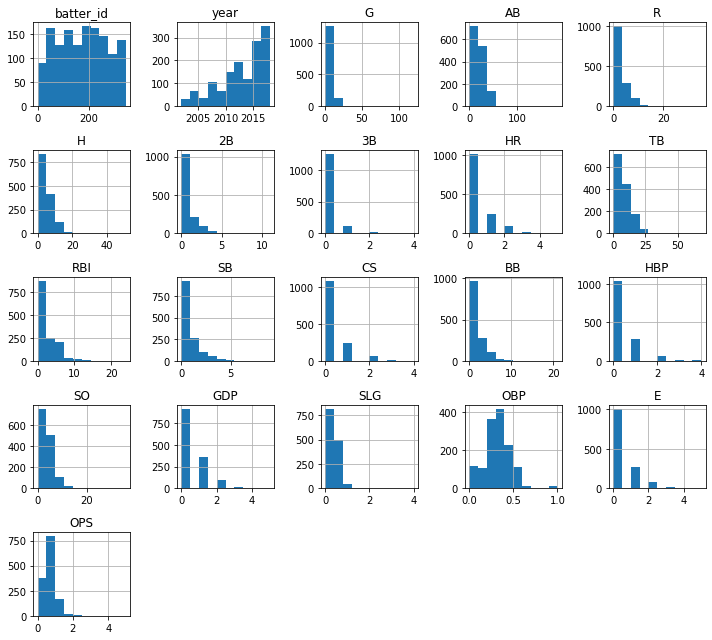

In [14]:
# 수치형 변수에 대해 histogram으로 분포 살펴보자
preseason_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

In [ ]:
'''
수치형 변수의 데이터를 히스토그램으로 시각화한 결과 2B, 3B, AB, BB, CS, SLG, R, TB 등 대부분 값이 0에 가까운 낮은 값을 기록
이것은 프리시즌 경기 수가 적어서 나타나는 현상이라고 추측할 수 있다. 
2루타(2B), 3루타(3B), HBP(사구) 등의 기록을 보면 값의 범위가 매우 작게 형성되어 있다. 이 값들은 모두 0과 10사이의 수치를 기록

연도의 분포를 살펴보면 과거로 갈수록 기록의 수가 적어지는 것 확인. 과거로 갈수록 기록의 수가 적어진다. 
분포를 살펴본 결과 프리시즌 데이터는 그 양이 부족한 상황이다.
그래서 정규시즌 데이터와 비교해 봐야 한다. 
'''